In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file path
cus_churn = '/content/drive/MyDrive/churn/Churn_Modelling.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(cus_churn)

# Display the first few rows of the dataframe to verify
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
encoder = LabelEncoder()
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])

In [ ]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [ ]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

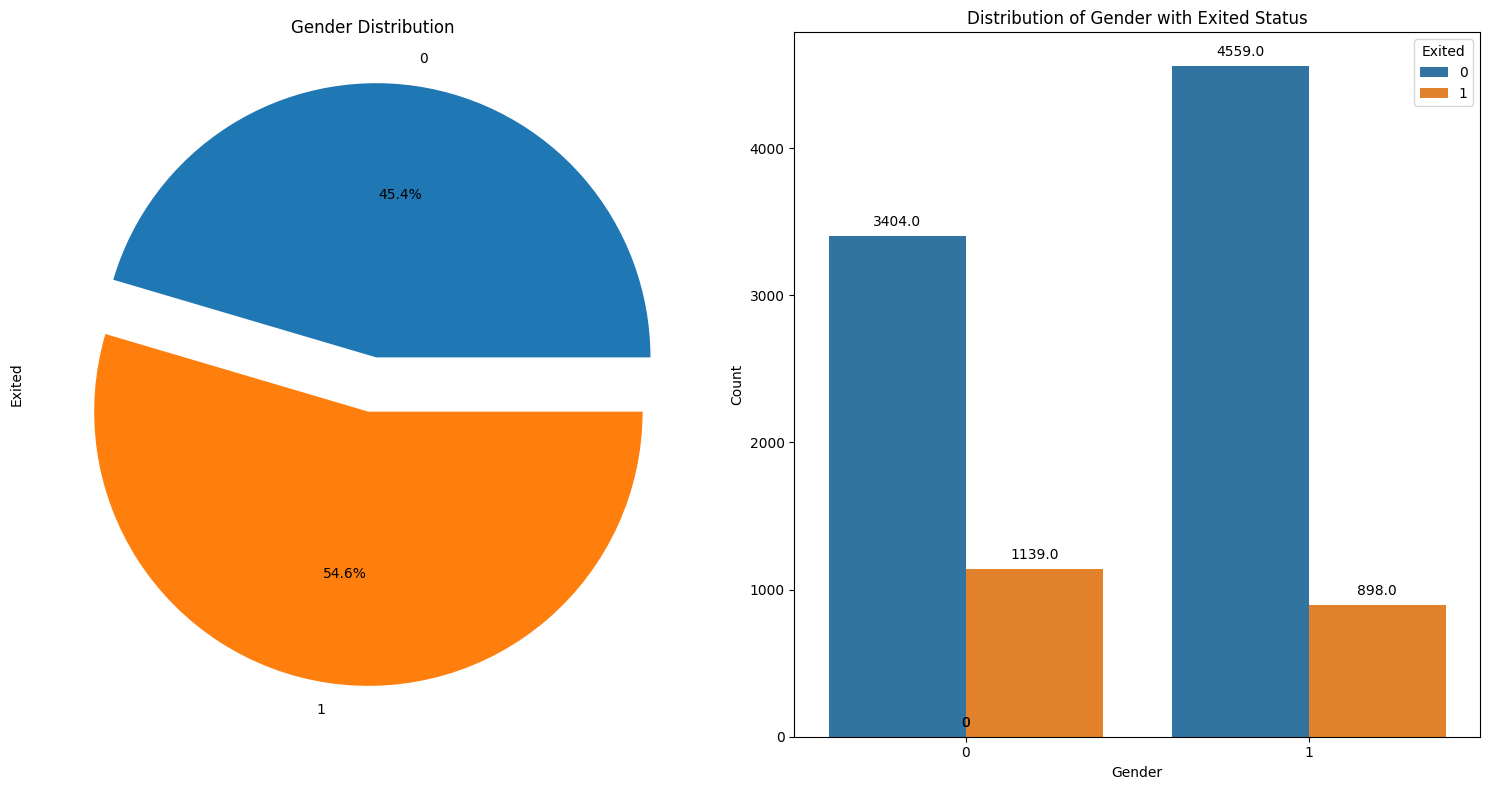

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axb = plt.subplots(ncols=2, nrows=1, figsize=(15, 8))
explode = [0.1, 0.1]
df.groupby('Gender')['Exited'].count().plot.pie(explode=explode, autopct="%1.1f%%", ax=axb[0])
axb[0].set_title('Gender Distribution')

# Count plot for Gender with Exited Status
ax = sns.countplot(x="Gender", hue="Exited", data=df, ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
axb[1].set_title('Distribution of Gender with Exited Status')
axb[1].set_xlabel('Gender')
axb[1].set_ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


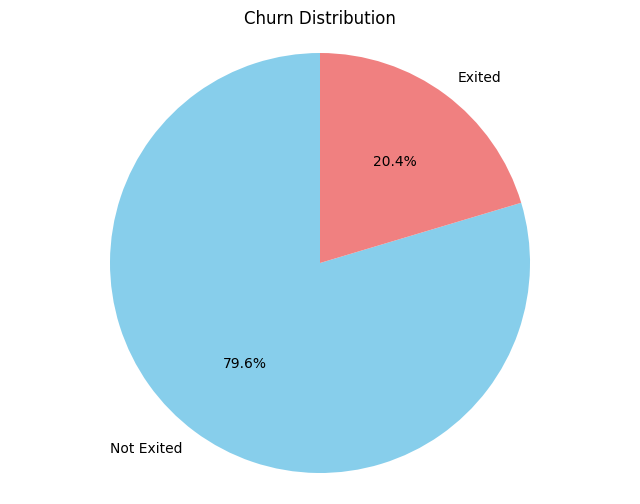

In [ ]:
import matplotlib.pyplot as plt

# Calculate counts of exited vs non-exited customers
exited_counts = df['Exited'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(exited_counts, labels=['Not Exited', 'Exited'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<ipython-input-12-1ad9b7b70665>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='Set1')


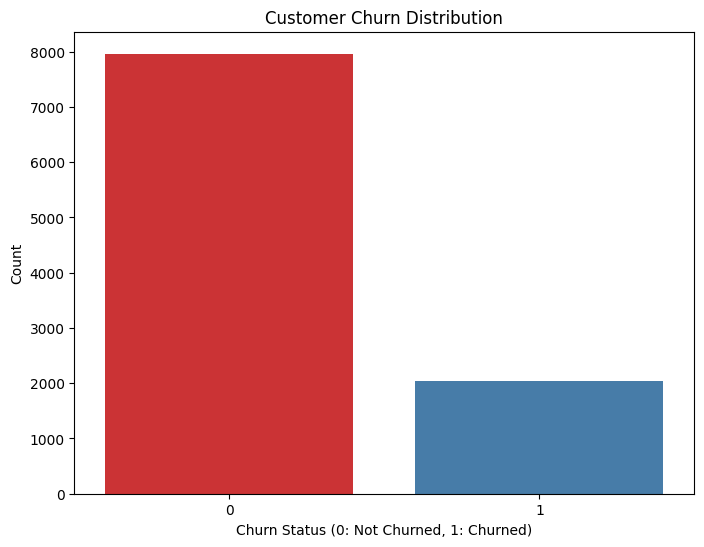

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class in the original dataset
class_counts = df["Exited"].value_counts()

# Plotting
plt.figure(figsize=(8, 6))

# Bar chart for class distribution
sns.countplot(x='Exited', data=df, palette='Set1')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn Status (0: Not Churned, 1: Churned)')
plt.ylabel('Count')

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate model performance on test set
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_logreg)
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Model Performance:
Accuracy: 0.8005
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

Confusion Matrix:
 [[1573   34]
 [ 365   28]]


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate model performance on test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Model Performance:
Accuracy: 0.8645
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:
 [[1546   61]
 [ 210  183]]


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb.predict(X_test)

# Evaluate model performance on test set
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Model Performance:")
print("Accuracy:", accuracy_gb)
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Model Performance:
Accuracy: 0.8655
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Confusion Matrix:
 [[1547   60]
 [ 209  184]]


LightGBM (LGBM)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb

# Assuming df is your preprocessed DataFrame with features and target variable

# Define features and target variable
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target variable

# Split data into training and test sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LightGBM model
lgbm = lgb.LGBMClassifier(random_state=42)

# Train the model
lgbm.fit(X_train, y_train)

# Predict on the test set
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_lgbm)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
Accuracy: 0.8675

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.74      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000


Confusion Matrix:
[[1537   70]
 [ 195  198]]


XGBoost (Extreme Gradient Boosting)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost model
xgb = XGBClassifier(random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate model performance on test set
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Model Performance:")
print("Accuracy:", accuracy_xgb)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Model Performance:
Accuracy: 0.861
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:
 [[1523   84]
 [ 194  199]]


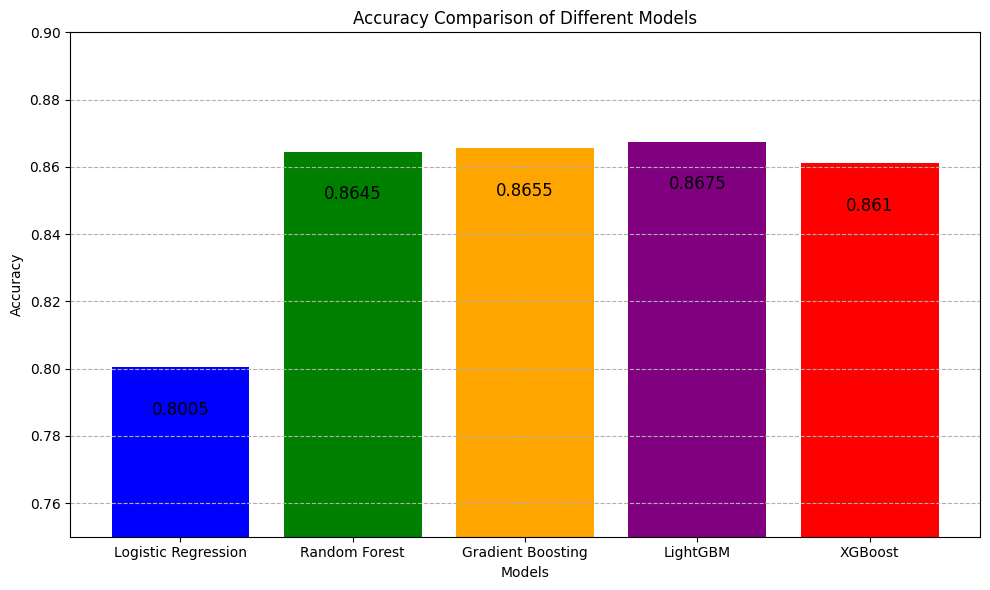

In [ ]:
import matplotlib.pyplot as plt

# Model names and corresponding accuracies
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'LightGBM', 'XGBoost']
accuracies = [0.8005, 0.8645, 0.8655, 0.8675, 0.861]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple', 'red'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.01, round(yval, 4), ha='center', va='top', fontsize=12)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0.75, 0.9)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()